##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 6


Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions 1 - 3 are worth 2 points each, questions 4-7 are worth 3 points each and question 8 is worth 5 points for a total of **23 points**.  To get full credit on question 8, you must use complete sentences, avoid unnecessary jargon and make a clear and concise recommendation with explanation.  Points will not be deducted for grammar errors. 

## Evaluating predictions for Universal Bank

Remember: You were recently hired as a data scientist by Universal Bank. You have created a range of predictive models to try to help the VP understand who might take out a personal loan.  Now we need to understand how those models compare.

#### 1.  Recall the model you would recommend to the VP from assignment #5.  Recreate that output here.  What is the accuracy, precision and recall of the model?  (2 points)

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(12345)
from sklearn import metrics
#code borrowed from Professor Cannon's lecture 6_pdf.

In [2]:
UB_df = pd.read_csv('UniversalBank.csv')
bank = pd.DataFrame(UB_df)
bank1 = bank.copy()

In [3]:
#create empty lists that will later be treated as objects to fill in each education level column.
undergrad = []
grad = []
prof = []

#create function that takes in education level as argument and add dummy varaible values (0 or 1) in corresponding education
#level column.
def edu_lvl(val):
    if val == 1:
        undergrad.append(1)
        grad.append(0)
        prof.append(0)
    elif val == 2:
        undergrad.append(0)
        grad.append(1)
        prof.append(0)
    elif val == 3:
        undergrad.append(0)
        grad.append(0)
        prof.append(1)

#execute function for each row value of the 'Education column'.
for i in bank1['Education']:
    edu_lvl(i)

bank1.insert(2, "Undergrad", undergrad, True)
bank1.insert(3, "Grad", grad, True)
bank1.insert(4, "Prof", prof, True)
del bank1['Education']

bank1 = bank1[['Personal Loan','Age','Experience','Undergrad','Grad','Prof','Income','Family','CCAvg','Mortgage',
              'Securities Account','CD Account','Online','CreditCard']]

In [4]:
X = bank1.iloc[:,1:]
Y = bank1.iloc[:,0]

import statsmodels.api as sm

logit = sm.Logit(Y, X)
result = logit.fit()

logreg = LogisticRegression(C=1e9, max_iter=5000)

from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 12345)

logreg.fit(X_train, Y_train)
y_test_predict = logreg.predict(X_test)

print("Model accuracy:",accuracy_score(Y_test, y_test_predict))

Optimization terminated successfully.
         Current function value: 0.117230
         Iterations 9
Model accuracy: 0.957


Accuracy of the model is 95.7%.

In [5]:
logreg_results = logreg.predict(X_test)
print("Log Regression Results")
pd.crosstab(logreg_results,Y_test,rownames = ["Predicted"], colnames = ["Actual"])

Log Regression Results


Actual,0,1
Predicted,,
0,892,31
1,12,65


Precision: TP/(TP+FP) -> How many positives we predicted correctly out of all the positive predictions we
made.<br>
TP (True Positive) = 65 <br>
FP (False Positive) = 12 <br>
Precision: 65/(65+12) = 84.42%. <br>
<br>
Recall or True Positive Rate:TP/(TP+FN) -> How many positives we predicted correctly out of all the cases that
were really positive.<br>
FN (False Negative) = 31 <br>
Recall: 65/(65+31) = 67.71%

In [6]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, logreg_results))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.84      0.68      0.75        96

    accuracy                           0.96      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.96      0.95      1000



#### 2. Which measure of model performance is more appropriate for the VP to consider?  Why? (2 points)

I believe True Positive Rate/Recall rate would be the appropriate measure for the VP to consider, because the precision rate represents the rate of correctly predicted data points out of all the positive predictions made. This means ultimately, precision rate only concerns with predicted values, whereas the recall rate is based on the actual cases that were positive. This also suggests that if the predictive model is completely off and we predict a vast majority correctly out of all the positive predictions, we could be getting a high precision rate even if the model is inaccruate. An exmaple of such case that was covered in the lecture was the telecom company model in which the model predicted that no one would leave the company's service, which returned a high accruacy but did not account for customers who actually left. The model is terrible at predicting the outcome of minority classes.

#### 3.  Create a table of the difference performance criteria for all the models you have run so far. (This can be rerun in code or typed in a markdown table). Which are the two that perform best based on the criteria you recommend above?  (2 points)

In [7]:
from sklearn.preprocessing import MinMaxScaler

NB Model:

In [8]:
NB_bank = bank.copy()
NB_bank = NB_bank.drop(columns = ['Age','Experience','Income','ZIP Code','Family','CCAvg','Mortgage','Personal Loan'])
NB_X = NB_bank.iloc[:,0:]

In [9]:
NB_X_train, NB_X_test, Y_train, Y_test = train_test_split(NB_X, Y, test_size = 0.2, random_state = 12345)

In [10]:
NB = MultinomialNB()
NB.fit(NB_X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
NB_results = NB.predict(NB_X_test)
print("NB Results")
pd.crosstab(NB_results,Y_test,rownames = ["Predicted"], colnames = ["Actual"])

NB Results


Actual,0,1
Predicted,,
0,904,96


Recall or True Positive Rate:TP/(TP+FN) <br>
TP (True Positive) = 0 <br>
FN (False Negative) = 96 <br>
Recall: 0/(0+96) = 0% <br>
The problem with this model is that it did not predict any of them to be true. Therefore the problem of class balance occurs.

In [12]:
print(classification_report(Y_test, NB_results))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       904
           1       0.00      0.00      0.00        96

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.82      0.90      0.86      1000



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Model:

In [13]:
KNN_bank = bank.copy()
KNN_bank = KNN_bank.drop(columns = ['Age','Education','ZIP Code','Personal Loan','Securities Account','Online','CreditCard',
                                    'Family','Mortgage','CD Account'])

In [14]:
KNN_X = KNN_bank.iloc[:,0:]

In [15]:
KNN_X_train, KNN_X_test, Y_train, Y_test = train_test_split(KNN_X, Y, test_size = 0.2, random_state = 12345)

In [16]:
KNN = KNeighborsClassifier(n_neighbors = 20)
KNN.fit(KNN_X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [17]:
KNN_results = KNN.predict(KNN_X_test)
print("KNN Results")
pd.crosstab(KNN_results,Y_test,rownames = ["Predicted"], colnames = ["Actual"])

KNN Results


Actual,0,1
Predicted,,
0,885,68
1,19,28


Recall or True Positive Rate:TP/(TP+FN) <br>
TP (True Positive) = 28 <br>
FN (False Negative) = 68 <br>
Recall: 28/(28+68) =  29.17% <br>

In [18]:
print(classification_report(Y_test, KNN_results))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       904
           1       0.60      0.29      0.39        96

    accuracy                           0.91      1000
   macro avg       0.76      0.64      0.67      1000
weighted avg       0.90      0.91      0.90      1000



Decision Tree Model:

In [19]:
import io

DT_bank = bank.copy()
DT_bank = DT_bank.drop(columns=['Age','Experience','Personal Loan','Income','ZIP Code','Family','CCAvg','Mortgage'])
DT_X = DT_bank.iloc[:,0:]

In [20]:
DT_X_train, DT_X_test, Y_train, Y_test = train_test_split(DT_X, Y, test_size = 0.2, random_state=12345)

In [21]:
DT = DecisionTreeClassifier(criterion = "entropy")
DT.fit(DT_X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
DT_results = DT.predict(DT_X_test)
print("DT Results")
pd.crosstab(DT_results,Y_test,rownames = ["Predicted"], colnames = ["Actual"])

DT Results


Actual,0,1
Predicted,,
0,896,73
1,8,23


Recall or True Positive Rate:TP/(TP+FN) <br>
TP (True Positive) = 23 <br>
FN (False Negative) = 73 <br>
Recall: 23/(23+73) =  23.96% <br>

In [23]:
print(classification_report(Y_test, DT_results))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       904
           1       0.74      0.24      0.36        96

    accuracy                           0.92      1000
   macro avg       0.83      0.62      0.66      1000
weighted avg       0.91      0.92      0.90      1000



RF Model:

In [24]:
RF_bank = DT_bank.copy()
RF_X = DT_bank.iloc[:,0:]

In [25]:
RF_X_train, RF_X_test, Y_train, Y_test = train_test_split(RF_X, Y, test_size = 0.2, random_state=12345)

In [26]:
RF = RandomForestClassifier(random_state = 12345)
RF.fit(RF_X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [27]:
RF_results = RF.predict(RF_X_test)
print("RF Results")
pd.crosstab(RF_results,Y_test,rownames = ["Predicted"], colnames = ["Actual"])

RF Results


Actual,0,1
Predicted,,
0,892,73
1,12,23


Recall or True Positive Rate:TP/(TP+FN) <br>
TP (True Positive) = 23 <br>
FN (False Negative) = 73 <br>
Recall: 23/(23+73) =  23.96% <br>

In [28]:
print(classification_report(Y_test, RF_results))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       904
           1       0.66      0.24      0.35        96

    accuracy                           0.92      1000
   macro avg       0.79      0.61      0.65      1000
weighted avg       0.90      0.92      0.90      1000



According to the recall rates, log regression model and KNN model are the two that perform best with recall rates of 67.61% and 29.17% respectively.

#### 4.  Chart the ROC curves for the two models and compare the areas under the curves.  Is there a marked difference their shapes or areas? Why do you think that is? Does this change your recommendation for "best" model? (3 points)

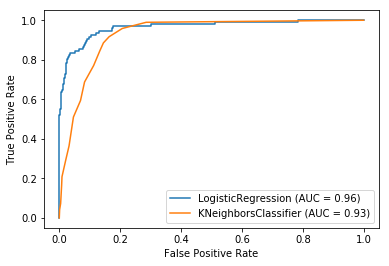

In [29]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
logreg_disp = plot_roc_curve(logreg, X_test, Y_test)
KNN_disp = plot_roc_curve(KNN, KNN_X_test, Y_test, ax=logreg_disp.ax_)

#code borrowed from Professor Cannon's lecture 6_pdf.

As mentioned in the lecture notes, "The ROC (receiver operating characteristics) curve displays the true positive rate (sensitivity) against the false positive rate (1-specificity). The closer the curve follows the left hand border and then the top left border of the ROC space, the more accurate the model." <br>
This supports my choice of advising the VP to use the recall rate with the log regression model as it bases the rate on the number of customers who actually took out personal loans(TP), rather than the number of customers that the model predicts will take out a personal loan. We can see that the curve of the log regression in the graph above converges closely to 1.0 on the y-axis (True Positve Rate) and converges closely to 0.0 on the x-axis (False Positive Rate). This follows the pattern mentioned in the lecture notes referenced above that "The closer the curve follows the left hand border and then the top left border of the ROC space, the more accurate the model".

In [30]:
logreg_disp.figure_.suptitle("ROC curve comparison")
plt.show()

print("Logistic: " , metrics.roc_auc_score(Y_test, logreg_results))
print("KNN: " , metrics.roc_auc_score(Y_test, KNN_results))

#code borrowed from Professor Cannon's lecture 6_pdf.

Logistic:  0.8319044985250739
KNN:  0.6353244837758112


#### 5. Run a bagged version of the two models.  What parameter settings did you choose?  Does the result change your decision about the "best" model? (3 points)

In [31]:
from sklearn.ensemble import BaggingClassifier

LogReg_bag = BaggingClassifier(n_estimators=30, base_estimator=logreg, oob_score=True, random_state=0)
LogReg_bag.fit(X_train,Y_train)
print('OOB', LogReg_bag.oob_score_)

predicted=LogReg_bag.predict(X_test)
print("Bagged log_reg model: ", metrics.classification_report(Y_test, predicted))

OOB 0.96025
Bagged log_reg model:                precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.83      0.67      0.74        96

    accuracy                           0.95      1000
   macro avg       0.90      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



In [32]:
KNN_bag = BaggingClassifier(n_estimators=30, base_estimator=KNN, oob_score=True, random_state=0)
KNN_bag.fit(KNN_X_train,Y_train)
print('OOB', KNN_bag.oob_score_)

predicted=KNN_bag.predict(KNN_X_test)
print("Bagged KNN model: ", metrics.classification_report(Y_test, predicted))

OOB 0.908
Bagged KNN model:                precision    recall  f1-score   support

           0       0.93      0.98      0.95       904
           1       0.59      0.31      0.41        96

    accuracy                           0.91      1000
   macro avg       0.76      0.64      0.68      1000
weighted avg       0.90      0.91      0.90      1000



As a general rule of thumb in statistics, a sample size of less than 30 is considered a small sample, so n_estimator parameter is set to 30 as done in the lecture notes. The base_estimator parameter is set to 'logreg' and 'KNN' respectively as those are the models we want to replicate to get a larger sample size to bag. <br>
Bagging actually results in a 1% reduction from 68% to 67& in the log regression model's recall rate, while the KNN model's increases by 2% from 29% to 31%. My decision on the "best model" does not change as the log regression model still has a significantly higher recall rate than the KNN model.

#### 6. Run a boosted version of the two models.  What parameter settings did you choose?  Does the result change your decision about the "best" model? (3 points)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

logregboost = AdaBoostClassifier(LogisticRegression(solver = 'lbfgs', C=1e9, max_iter = 1000000000),n_estimators=200)
logregboost.fit(X_train, Y_train)

print("logregboost: " + str(metrics.classification_report(Y_test, logregboost.predict(X_test))))

logregboost:               precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.65      0.73        96

    accuracy                           0.95      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [34]:
measurements = {'Precision':[.84,.83,.84], 'Recall':[.68,.67,.65], 'f1-score':[.75,.74,.73]}
m_df = pd.DataFrame(measurements,index=['Log_reg','Bagged log_reg','Boosted log_reg'])
m_df

,Precision,Recall,f1-score
Log_reg,0.84,0.68,0.75
Bagged log_reg,0.83,0.67,0.74
Boosted log_reg,0.84,0.65,0.73


The results of the boosted version as well as the previously generated bagged version are interesting because they are both lower than the recall rate of the first version of the log regression (68%). It's interesting because both bagging and boosting takes an ensemble of weak learners and creates a stronger model, but perhaps the reason why they yield lower recall rates is because both versions are overfitting the data with more samples and therefore it's becoming less closer to the true positive results. The KNN model cannot be boosted presumably because it is a lazy learner and therefore we cannot "train" it. Not being able to train the model results in no weighting to penalize inaccurately predicted results, and therefore we cannot boost it as boosting requires weights.

#### 7.  Try addressing the class imbalance by using one of the three approches outlined in class.  Does it improve the performance of your "best" model?  (3 points) 

Oversample the minority class by matching sampling size to half of majority sample size: <br>
In question 1, the number of people that did not take out a personal loan was 892+12 = 904 and the number of people that took out a personal loan was 96. The class imbalance was at an approximate ratio of 10.6:1 (major:minor) so we will try to reduce the gap.

In [35]:
from sklearn.utils import resample

X = pd.concat([X_train, Y_train], axis=1)

no_loan = X[X['Personal Loan']==0]
loan = X[X['Personal Loan']==1]

print(no_loan.shape)
print(loan.shape)
print(len(no_loan))
#code borrowed from Professor Cannon's lecture 6_pdf.

(3616, 14)
(384, 14)
3616


In [36]:
# upsample minority
loan_upsampled = resample(loan, replace=True, n_samples=int(len(no_loan)/2), random_state=27)

# combine majority and upsampled minority
upsampled = pd.concat([no_loan, loan_upsampled])
upsampled['Personal Loan'].value_counts()
#code borrowed from Professor Cannon's lecture 6_pdf.

0    3616
1    1808
Name: Personal Loan, dtype: int64

In [37]:
Y_train = upsampled['Personal Loan']
X_train = upsampled.drop('Personal Loan', axis=1)

logreg = LogisticRegression(solver = 'lbfgs', C=1e9, max_iter = 5000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print("accuracy of logistic: " + str(metrics.accuracy_score(Y_test, logreg.predict(X_test))))
print("Logit Results")
pd.crosstab(logreg.predict(X_test),Y_test,rownames = ["Predicted"], colnames = ["Actual"])

accuracy of logistic: 0.933
Logit Results


Actual,0,1
Predicted,,
0,849,12
1,55,84


Recall or True Positive Rate:TP/(TP+FN) -> How many positives we predicted correctly out of all the cases that
were really positive.<br>
TP (True Positive) = 84 <br>
FN (False Negative) = 12 <br>
Recall: 84/(84+12) = 87.5% <br>
Oversampling the minority class ('Personal Loan' = 1) by upscaling it to the have of the sample size of the majority class ('Personal Loan' = 0) increased the recall rate from 67.71% to 87.5%, thus improving it.

#### 8. Of all the models you have run for the VP of Universal Bank (Logistic, KNN, NB, DT, RF), and all the tricks we have used to find the "best" model, which one wins? Why? Write a short paragraph for the VP explaining your approach and your final recommendation. (5 points)

I would recommend the log regression model and the recall rate produced from oversampling the minority class. The reason behind this choice is not simply because the log regression model has the highest accuracy, but because it has the highest recall rate which can further be improved by reducing class imbalance between the majority('Peronal Loan'=0) and minority('Peronal Loan'=1) classes. As discussed in question 2, <br> 
"the precision rate represents the rate of correctly predicted data points out of all the positive predictions made. This means ultimately, precision rate only concerns with predicted values, whereas the recall rate is based on the actual cases that were positive. This also suggests that if the predictive model is completely off and we predict a vast majority correctly out of all the positive predictions, we could be getting a high precision rate even if the model is inaccruate." <br>
If we create a ROC curve for every model we have run so far, we can see the visual comparison between their accuracies in getting the actual values correctly, not the predicted values:

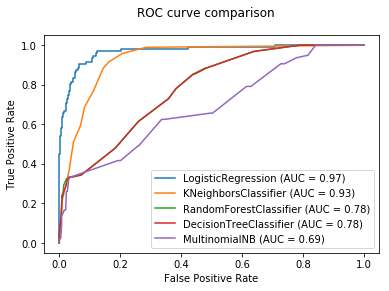

Logistic:  0.8319044985250739
KNN:  0.6353244837758112
RF:  0.6131544985250738
DT:  0.6153668879056047
NB:  0.5


In [39]:
logreg_disp = plot_roc_curve(logreg, X_test, Y_test)
KNN_disp = plot_roc_curve(KNN, KNN_X_test, Y_test, ax=logreg_disp.ax_)
RF_disp = plot_roc_curve(RF, RF_X_test, Y_test, ax=logreg_disp.ax_)
DT_disp = plot_roc_curve(DT, DT_X_test, Y_test, ax=logreg_disp.ax_)
NB_disp = plot_roc_curve(NB, NB_X_test, Y_test, ax=logreg_disp.ax_)

logreg_disp.figure_.suptitle("ROC curve comparison")
plt.show()

print("Logistic: " , metrics.roc_auc_score(Y_test, logreg_results))
print("KNN: " , metrics.roc_auc_score(Y_test, KNN_results))
print("RF: " , metrics.roc_auc_score(Y_test,RF_results))
print("DT: " , metrics.roc_auc_score(Y_test, DT_results))
print("NB: " , metrics.roc_auc_score(Y_test, NB_results))

As we can see, the log regression model displays the highest TPR and the lowest FPR. In conclusion, if the VP wants to know which model is best at predicting which of the bank's customers will take out a personal loan based on previous data on customer who did/did not take out personal loans, the log regression model would be the best choice to train with the 'UniversalBank.csv' raw data.

## Working code below

All working code is shown under each question.